We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use Classification algorithms.


*   Linear Regression
*   Support Vector Machine



In [13]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

**Read Data**

---



In [14]:
df = pd.read_csv('heart.csv')

In [15]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
df.shape

(918, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Data contains;

* Age - age in years
* Sex - (1 = male; 0 = female)
* ChestPainType - chest pain type
* RestingBP - resting blood pressure (in mm Hg on admission to the hospital)
* Cholesterol - serum cholestoral in mg/dl
* FastingBS  - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* RestingECG  - resting electrocardiographic results
* MaxHR - maximum heart rate achieved
* ExerciseAngina - exercise induced angina (1 = yes; 0 = no)
* Oldpeak - ST depression induced by exercise relative to rest
* ST_Slope - the slope of the peak exercise ST segment
* HeartDisease - have disease or not (1=yes, 0=no)

In [18]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [19]:
en = LabelEncoder()

In [20]:
# df.drop(columns=['ChestPainType','RestingECG','ST_Slope'])
cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for col in cols:
    df[col] = en.fit_transform(df[col])

In [21]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


Text(0.5, 1.0, 'Age wise distribution')

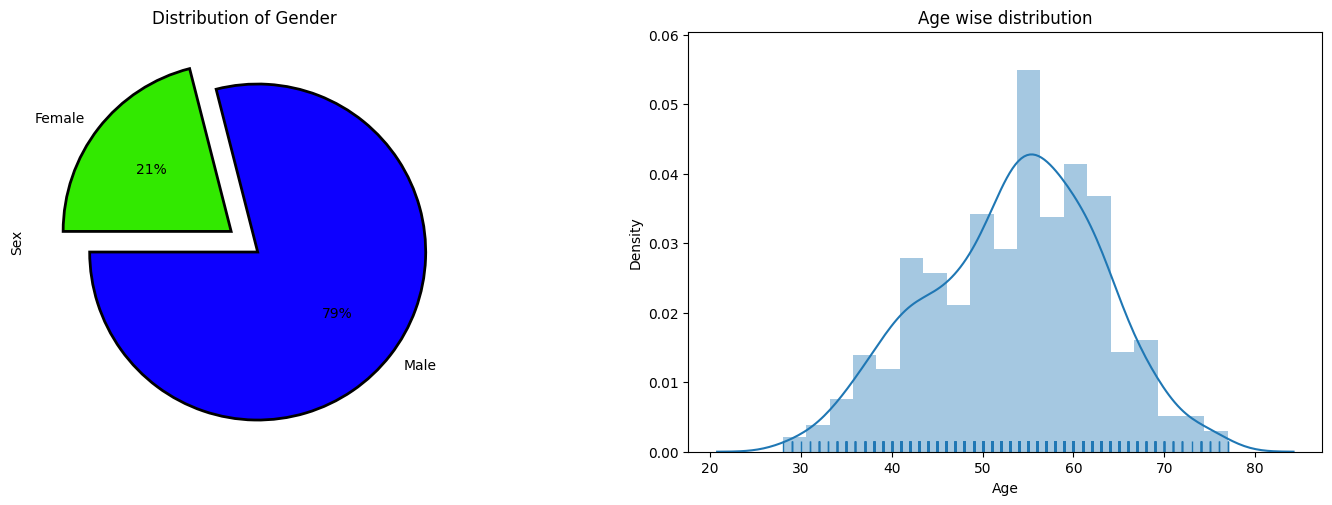

In [22]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df['Sex'].value_counts().plot.pie(autopct = '%1.0f%%', colors = sns.color_palette('prism',5), startangle = 900, labels =['Male','Female'], wedgeprops = {'linewidth':2, 'edgecolor':'k'}, explode = [.1,.1])
plt.title('Distribution of Gender')
plt.subplot(222)
ax = sns.distplot(df['Age'], rug = True)
plt.title('Age wise distribution')


In [23]:
df.groupby('HeartDisease').mean()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
HeartDisease,,,,,,,,,,,
0,50.551220,0.651220,1.192683,130.180488,227.121951,0.107317,0.948780,148.151220,0.134146,0.408049,1.739024
1,55.899606,0.901575,0.448819,134.185039,175.940945,0.334646,1.021654,127.655512,0.622047,1.274213,1.057087


In [24]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [25]:
x = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [26]:
print(x)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [27]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, stratify= y, random_state = 2)

In [29]:
print(x_train.shape)
print(x_test.shape)

(734, 11)
(184, 11)


## **Building Logistic Regression Model**

---



In [30]:
model = LogisticRegression(random_state = 1, max_iter = 1000).fit(x_train, y_train)

In [31]:
y_pred = model.predict(x_test)

In [45]:
x_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred, y_train)

In [33]:
print("Accuracy of training data: ",training_data_accuracy * 100)

Accuracy of training data:  85.55858310626702


In [34]:
x_test_pred = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_pred, y_test)

In [35]:
print("Accuracy of testing data: ",testing_data_accuracy * 100)

Accuracy of testing data:  84.78260869565217


## **Building SVM Model**

---



In [36]:
classifier = svm.SVC(kernel= 'linear')

In [37]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [38]:
x_train_pred2 = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred2, y_train)

In [39]:
print("Accuracy of training data: ",training_data_accuracy * 100)

Accuracy of training data:  85.96730245231608


In [40]:
x_test_pred2 = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_pred2, y_test)

In [41]:
print("Accuracy of testing data: ",testing_data_accuracy * 100)

Accuracy of testing data:  85.86956521739131


## Review Model

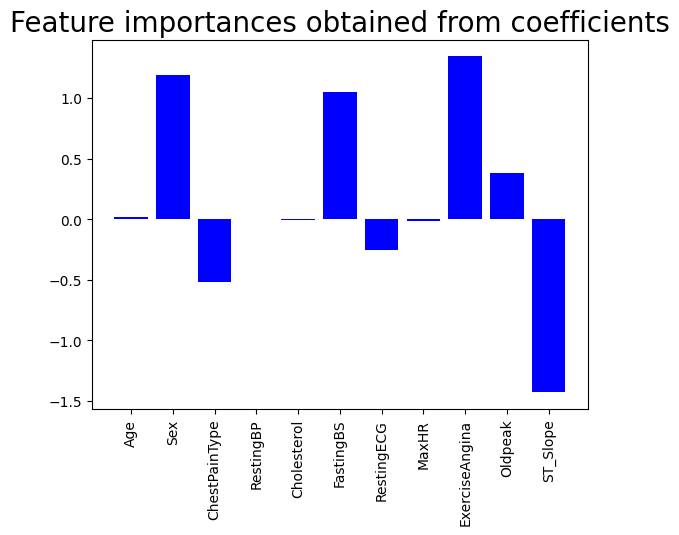

In [42]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='blue')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

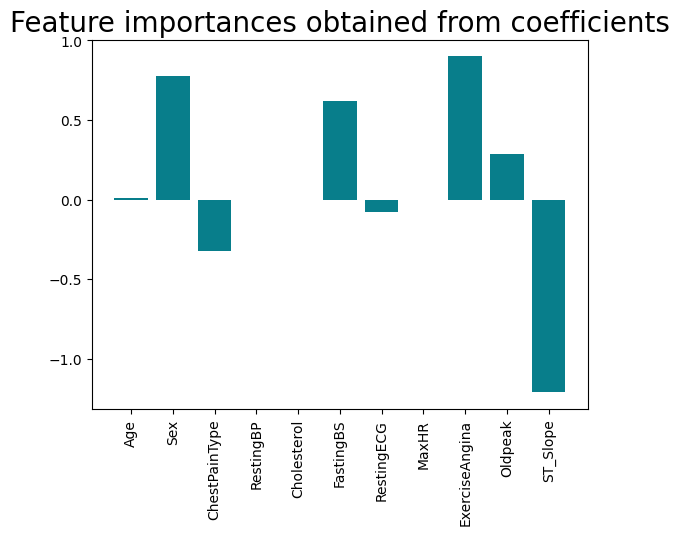

In [43]:
imp = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': classifier.coef_[0]
})
plt.bar(x=imp['Attribute'], height=imp['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()